In [10]:
import pandas as pd 

def sleep_fuzzy(minutes):
    if minutes <= 300:
        return {'low': 1.0, 'medium': 0.0, 'high': 0.0}
    elif 300 < minutes <= 360:
        low = (360 - minutes) / 60
        medium = (minutes - 300) / 60
        return {'low': low, 'medium': medium, 'high': 0.0}
    elif 360 < minutes <= 480:
        return {'low': 0.0, 'medium': 1.0, 'high': 0.0}
    elif 480 < minutes <= 540:
        medium = (540 - minutes) / 60
        high = (minutes - 480) / 60
        return {'low': 0.0, 'medium': medium, 'high': high}
    else:
        return {'low': 0.0, 'medium': 0.0, 'high': 1.0}

def hr_fuzzy(hr):
    if hr <= 60:
        return {'low': 1.0, 'medium': 0.0, 'high': 0.0}
    elif 60 < hr <= 70:
        low = (70 - hr) / 10
        medium = (hr - 60) / 10
        return {'low': low, 'medium': medium, 'high': 0.0}
    elif 70 < hr <= 90:
        return {'low': 0.0, 'medium': 1.0, 'high': 0.0}
    elif 90 < hr <= 100:
        medium = (100 - hr) / 10
        high = (hr - 90) / 10
        return {'low': 0.0, 'medium': medium, 'high': high}
    else:
        return {'low': 0.0, 'medium': 0.0, 'high': 1.0}

def sedentary_fuzzy(minutes):
    if minutes <= 500:
        return {'low': 1.0, 'medium': 0.0, 'high': 0.0}
    elif 500 < minutes <= 600:
        low = (600 - minutes) / 100
        medium = (minutes - 500) / 100
        return {'low': low, 'medium': medium, 'high': 0.0}
    elif 600 < minutes <= 1000:
        return {'low': 0.0, 'medium': 1.0, 'high': 0.0}
    elif 1000 < minutes <= 1100:
        medium = (1100 - minutes) / 100
        high = (minutes - 1000) / 100
        return {'low': 0.0, 'medium': medium, 'high': high}
    else:
        return {'low': 0.0, 'medium': 0.0, 'high': 1.0}


In [2]:
def calculate_fuzzy_risk(row):
    sleep_membership = sleep_fuzzy(row['TotalMinutesAsleep'])
    hr_membership = hr_fuzzy(row['AverageHeartRate'])
    sedentary_membership = sedentary_fuzzy(row['SedentaryMinutes_x'])

    
    score = (
        sleep_membership['medium'] * 0.5 + sleep_membership['high'] * 1 +
        hr_membership['medium'] * 0.5 + hr_membership['high'] * 1 +
        sedentary_membership['medium'] * 0.5 + sedentary_membership['high'] * 1
    )
    return score


In [6]:
def categorize_fuzzy_risk(score):
    if score < 1:
        return 'Low Risk'
    elif 1 <= score < 2:
        return 'Medium Risk'
    else:
        return 'High Risk'

In [12]:
df = pd.read_csv('clean_dataset.csv')
df = df.dropna()
df = df[df['RiskCategory'] != 'High Risk']
df['FuzzyRiskScore'] = df.apply(calculate_fuzzy_risk, axis=1)
df['FuzzyRiskCategory'] = df['FuzzyRiskScore'].apply(categorize_fuzzy_risk)
print(df[['TotalMinutesAsleep', 'AverageHeartRate', 'SedentaryMinutes_x', 'FuzzyRiskScore', 'FuzzyRiskCategory']].head())

     TotalMinutesAsleep  AverageHeartRate  SedentaryMinutes_x  FuzzyRiskScore  \
190               437.0         68.656250                1053        1.697813   
198               506.0         99.505814                 821        2.191957   
205               511.0         84.134571                 716        1.758333   
212               531.0         98.233901                 543        2.051695   
248               467.0         73.812905                 676        1.500000   

    FuzzyRiskCategory  
190       Medium Risk  
198         High Risk  
205       Medium Risk  
212         High Risk  
248       Medium Risk  


In [13]:
df.to_csv('fuzzy_clean_dataset.csv', index=False)
print("Saved fuzzy-labeled dataset as 'fuzzy_clean_dataset.csv'")

Saved fuzzy-labeled dataset as 'fuzzy_clean_dataset.csv'


/var/folders/vm/hydvjtks52sd5g6f3lc2zwrm0000gn/T/ipykernel_1804/1069157304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FuzzyRiskCategory', palette='Set2')


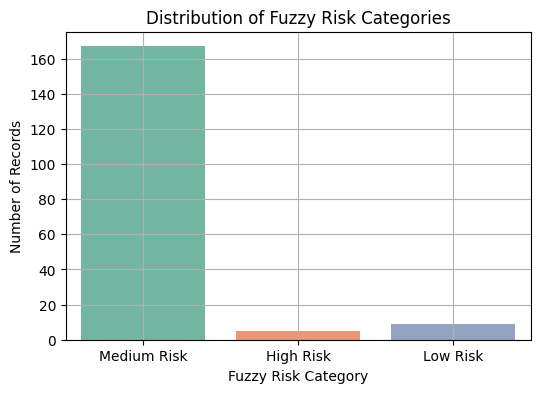

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='FuzzyRiskCategory', palette='Set2')
plt.title('Distribution of Fuzzy Risk Categories')
plt.xlabel('Fuzzy Risk Category')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

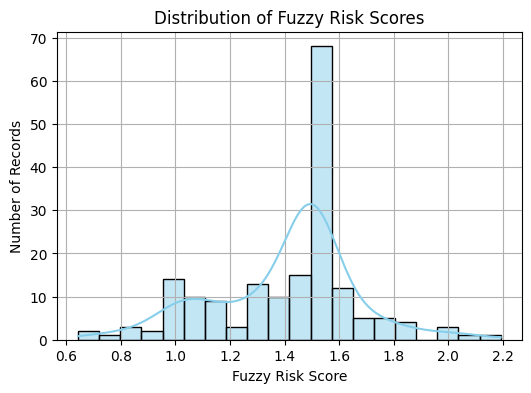

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['FuzzyRiskScore'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Fuzzy Risk Scores')
plt.xlabel('Fuzzy Risk Score')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

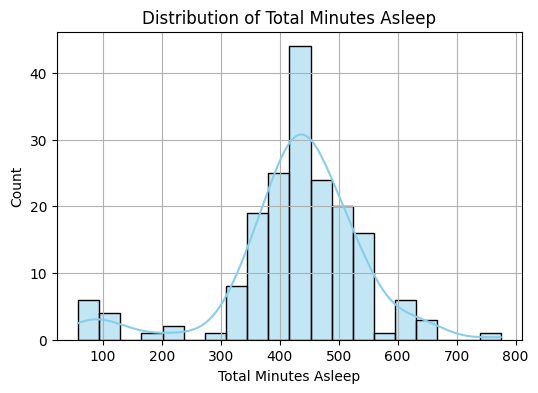

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['TotalMinutesAsleep'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Count')
plt.grid(True)
plt.show()

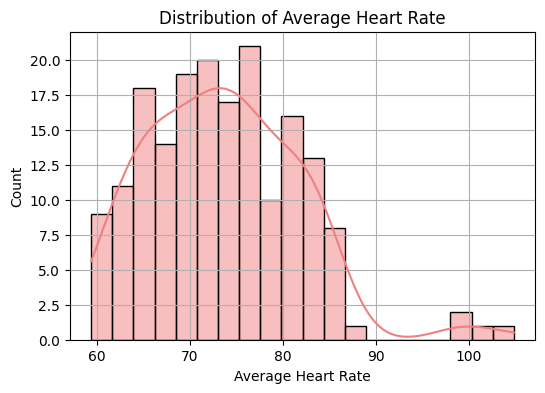

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['AverageHeartRate'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Count')
plt.grid(True)
plt.show()

/var/folders/vm/hydvjtks52sd5g6f3lc2zwrm0000gn/T/ipykernel_1804/464891997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskCategory', y='TotalMinutesAsleep', palette='pastel')


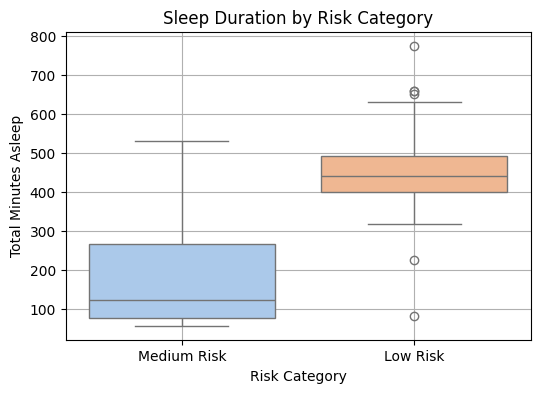

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='RiskCategory', y='TotalMinutesAsleep', palette='pastel')
plt.title('Sleep Duration by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Total Minutes Asleep')
plt.grid(True)
plt.show()

/var/folders/vm/hydvjtks52sd5g6f3lc2zwrm0000gn/T/ipykernel_1804/1913559398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskCategory', y='AverageHeartRate', palette='muted')


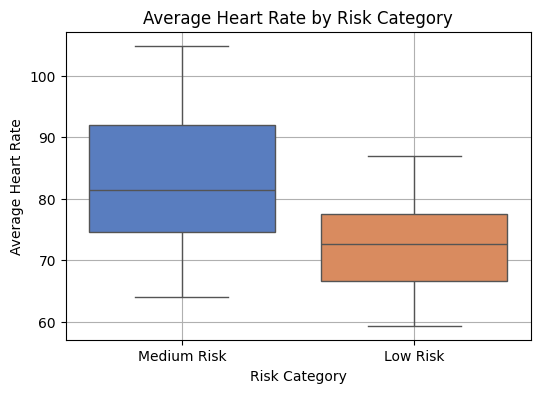

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='RiskCategory', y='AverageHeartRate', palette='muted')
plt.title('Average Heart Rate by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Heart Rate')
plt.grid(True)
plt.show()

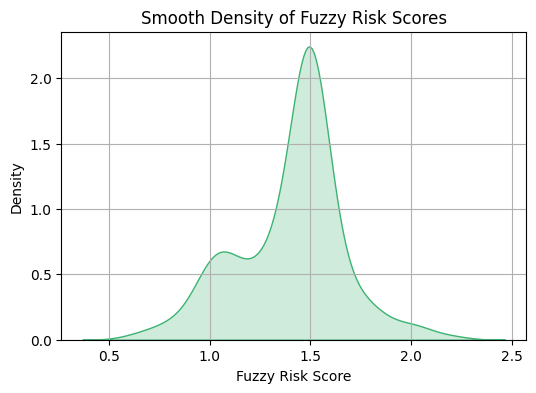

In [21]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['FuzzyRiskScore'], fill=True, color='mediumseagreen')
plt.title('Smooth Density of Fuzzy Risk Scores')
plt.xlabel('Fuzzy Risk Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()